# Data Science Job Analysis

Data science jobs are one of the jobs growing rapidly in the economy and mostly demanded in technology space. Since 2012, there has been a 650% increase in Data Scientist roles with no sign of stopping or declining anytime soon. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  #helps to normalizes data between zero an one


#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\HP ELITEBOOK 1040\Desktop\DATA ANALYSIS\INTERNSHIP\ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Dictionary

- work_year: The year the salary was paid.

- experience_level: The experience level in the job during the year with the following
possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE
Senior-level / Expert EX Executive-level / Director

- employment_type: The type of employement for the role: PT- Part-time, FT- Full-time, CT- Contract, FL- Freelance

- job_title: The role worked in during the year.

- salary: The total gross salary amount paid.

- salary_currency: The currency of the salary paid as an ISO 4217 currency code.

- salaryinusd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

- remote_ratio: The overall amount of work done remotely, possible values are as follows: 0-No remote work (less than 20%), 50 Partially remote 100 Fully
remote (more than 80%)

- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.

- company_size: The average number of people that worked for the company during the year: S- less than 50 employees (small), M - 50 to 250 employees (medium), L- more than 250 employees (large)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df['job_title'].nunique()

50

In [5]:
iso = pd.read_csv(r"C:\Users\HP ELITEBOOK 1040\Desktop\DATA ANALYSIS\INTERNSHIP\all.csv")
iso.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [6]:
iso = iso[['name', 'alpha-2']]
iso.head()

,name,alpha-2
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [7]:
# Pass dictionary into DataFrame
iso1 = pd.DataFrame(iso)

# rename the column
iso1.rename(columns={"alpha-2": "employee_residence"}, inplace=True)

iso1.head()

,name,employee_residence
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [8]:
merge = pd.merge(iso1, df, on='employee_residence', how='right')
merge.head()

,name,employee_residence,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,Germany,DE,0,2020,MI,FT,Data Scientist,70000,EUR,79833,0,DE,L
1,Japan,JP,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,0,JP,S
2,United Kingdom of Great Britain and Northern I...,GB,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,50,GB,M
3,Honduras,HN,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,0,HN,S
4,United States of America,US,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,50,US,L


In [9]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                607 non-null    object
 1   employee_residence  607 non-null    object
 2   Unnamed: 0          607 non-null    int64 
 3   work_year           607 non-null    int64 
 4   experience_level    607 non-null    object
 5   employment_type     607 non-null    object
 6   job_title           607 non-null    object
 7   salary              607 non-null    int64 
 8   salary_currency     607 non-null    object
 9   salary_in_usd       607 non-null    int64 
 10  remote_ratio        607 non-null    int64 
 11  company_location    607 non-null    object
 12  company_size        607 non-null    object
dtypes: int64(5), object(8)
memory usage: 66.4+ KB


In [10]:
merge=merge.drop(columns=['employee_residence','Unnamed: 0'])

In [11]:
merge.head()

,name,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,Germany,2020,MI,FT,Data Scientist,70000,EUR,79833,0,DE,L
1,Japan,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,0,JP,S
2,United Kingdom of Great Britain and Northern I...,2020,SE,FT,Big Data Engineer,85000,GBP,109024,50,GB,M
3,Honduras,2020,MI,FT,Product Data Analyst,20000,USD,20000,0,HN,S
4,United States of America,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,50,US,L


In [12]:
# rename the column
merge.rename(columns={"name": "employee_residence"}, inplace=True)

merge.head()

,employee_residence,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,Germany,2020,MI,FT,Data Scientist,70000,EUR,79833,0,DE,L
1,Japan,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,0,JP,S
2,United Kingdom of Great Britain and Northern I...,2020,SE,FT,Big Data Engineer,85000,GBP,109024,50,GB,M
3,Honduras,2020,MI,FT,Product Data Analyst,20000,USD,20000,0,HN,S
4,United States of America,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,50,US,L


In [13]:
# fixing the company location with a redable name
# rename the iso alpha column to company loacation
iso2 = pd.DataFrame(iso)
iso2.rename(columns={"employee_residence": "company_location"}, inplace=True)

iso2.head()

,name,company_location
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [14]:
# merge iso2 with merge head

data =  pd.merge(iso2, merge, on='company_location', how='right')
data.head()

,name,company_location,employee_residence,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size
0,Germany,DE,Germany,2020,MI,FT,Data Scientist,70000,EUR,79833,0,L
1,Japan,JP,Japan,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,0,S
2,United Kingdom of Great Britain and Northern I...,GB,United Kingdom of Great Britain and Northern I...,2020,SE,FT,Big Data Engineer,85000,GBP,109024,50,M
3,Honduras,HN,Honduras,2020,MI,FT,Product Data Analyst,20000,USD,20000,0,S
4,United States of America,US,United States of America,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,50,L


In [15]:
# dropping the column company location
data=data.drop(columns=['company_location'])


# rename the name column to company location
data.rename(columns={"name": "company_location"}, inplace=True)

data.head()

,company_location,employee_residence,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size
0,Germany,Germany,2020,MI,FT,Data Scientist,70000,EUR,79833,0,L
1,Japan,Japan,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,0,S
2,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,2020,SE,FT,Big Data Engineer,85000,GBP,109024,50,M
3,Honduras,Honduras,2020,MI,FT,Product Data Analyst,20000,USD,20000,0,S
4,United States of America,United States of America,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,50,L


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   company_location    607 non-null    object
 1   employee_residence  607 non-null    object
 2   work_year           607 non-null    int64 
 3   experience_level    607 non-null    object
 4   employment_type     607 non-null    object
 5   job_title           607 non-null    object
 6   salary              607 non-null    int64 
 7   salary_currency     607 non-null    object
 8   salary_in_usd       607 non-null    int64 
 9   remote_ratio        607 non-null    int64 
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [17]:
# checking the total number of company location
data['company_location'].nunique()

50

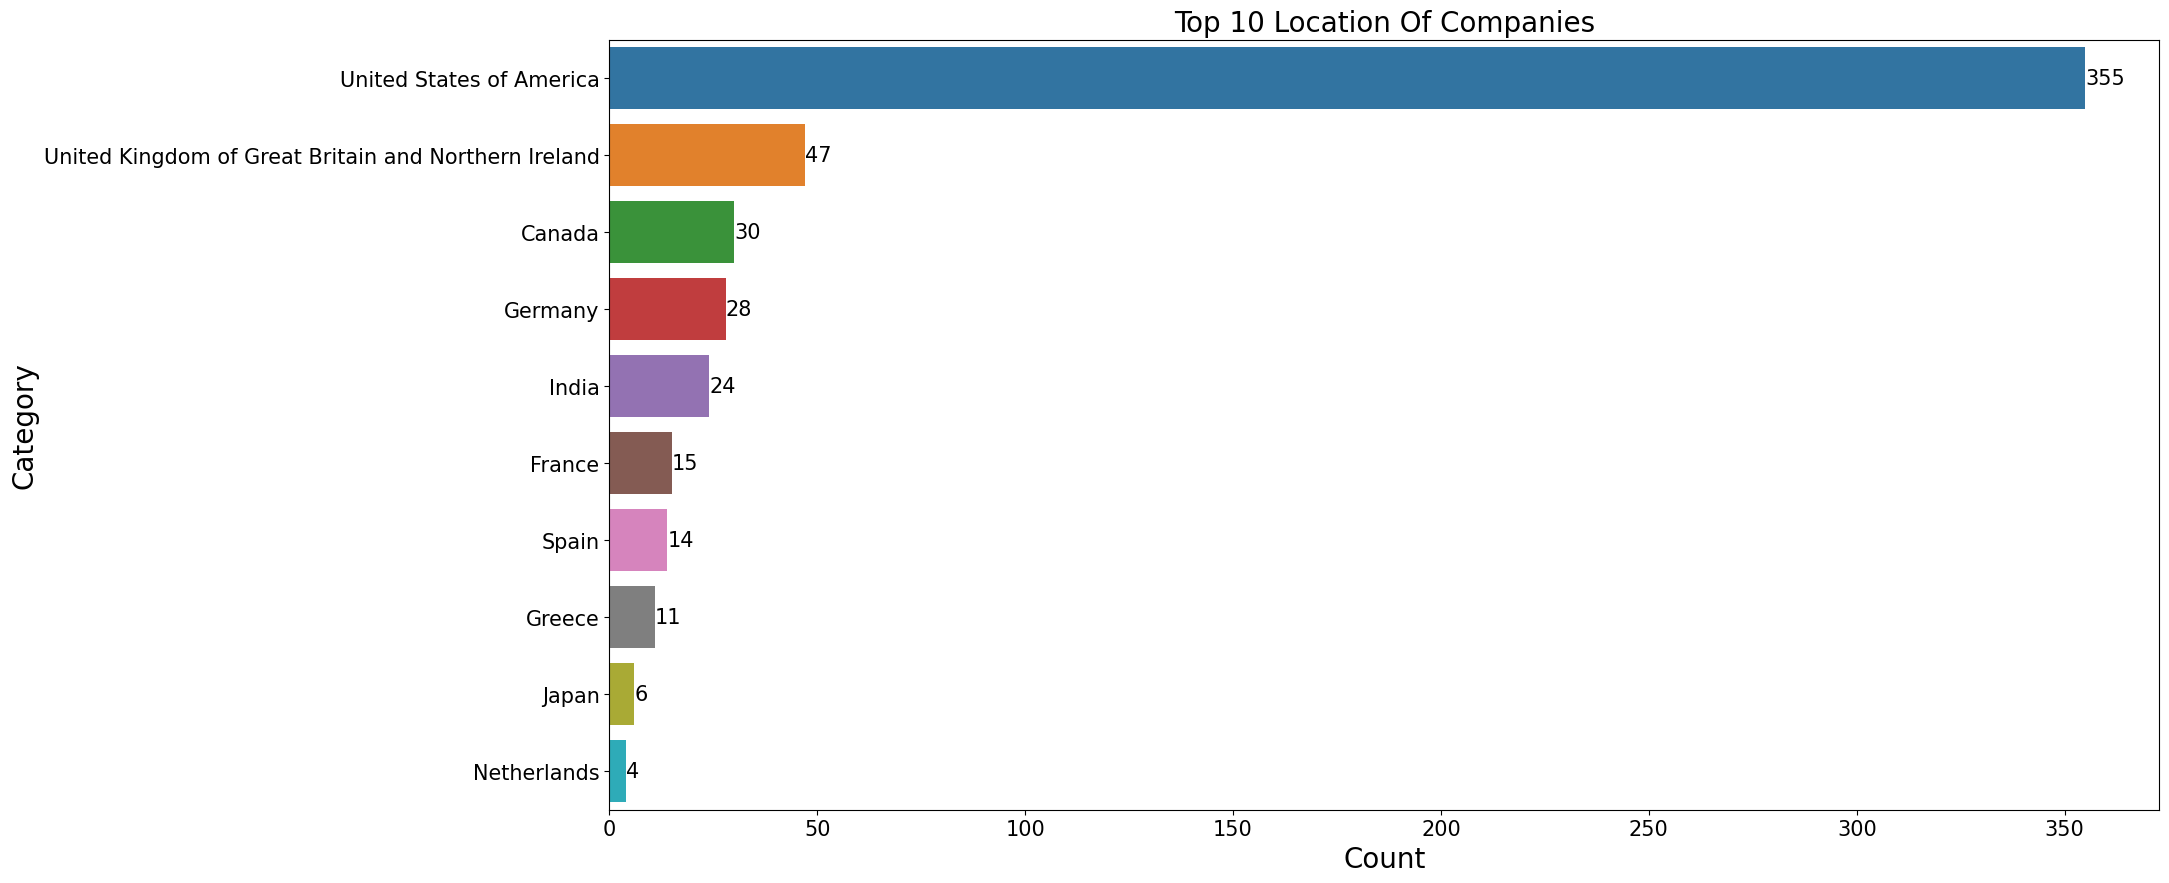

In [18]:
# Calculate the counts of each category
category_counts = data['company_location'].value_counts().head(10)

# Create a DataFrame with the top 10 categories and their counts
top_10_categories = pd.DataFrame({'company_location': category_counts.index, 'Count': category_counts.values})

# Plot the countplot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(data=top_10_categories, y='company_location', x='Count')
plt.ylabel('Category', size=20)
plt.yticks(fontsize=15, rotation=0, ha='right')
plt.xlabel('Count', size=20)
plt.xticks(fontsize=15, rotation=0, ha='center')
plt.title('Top 10 Location Of Companies', size=20)

# Add tooltips to the bars
for i, count in enumerate(top_10_categories['Count']):
    plt.text(count, i, str(count), va='center', fontsize=15)



plt.show()

In [19]:
top_10_categories

,company_location,Count
0,United States of America,355
1,United Kingdom of Great Britain and Northern I...,47
2,Canada,30
3,Germany,28
4,India,24
5,France,15
6,Spain,14
7,Greece,11
8,Japan,6
9,Netherlands,4


### Observation

The UNITED states of America has the highest number of company employing techs

In [20]:
data['job_title'].nunique()

50

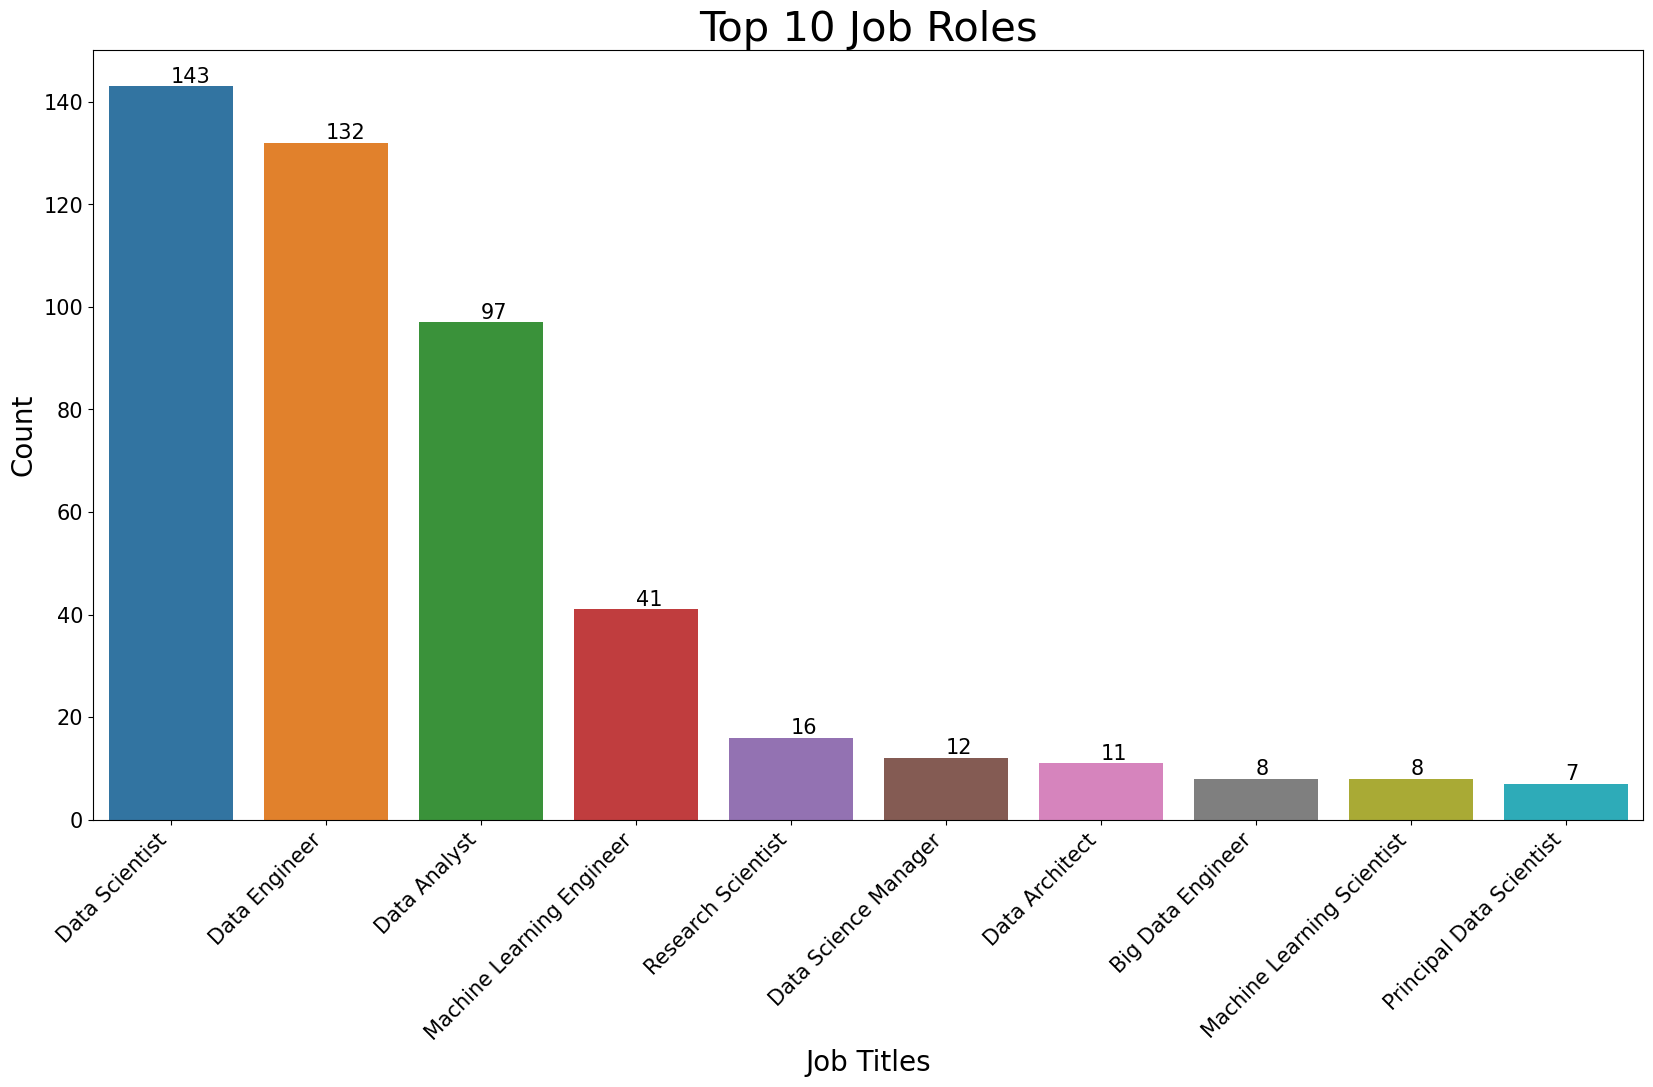

In [21]:
# Calculate the counts of each category
job_counts = data['job_title'].value_counts().head(10)

# Create a DataFrame with the top 10 categories and their counts
top_10_jobs = pd.DataFrame({'job_title': job_counts.index, 'Count': job_counts.values})

# Plot the countplot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(data=top_10_jobs, x='job_title', y='Count')
plt.xlabel('Job Titles', size=20)
plt.xticks(fontsize=15, rotation=45, ha='right')
plt.ylabel('Count', size=20)
plt.yticks(fontsize=15)
plt.title('Top 10 Job Roles', size=30)

# Add tooltips to the bars
for i, count in enumerate(top_10_jobs['Count']):
    plt.text(i, count, str(count), va='bottom', fontsize=15)


plt.show()


## Observation
- skills highly in demand includes data scientist, data engineer, data analysts, machine learning respectively

In [22]:
data['experience_level'].nunique()

4

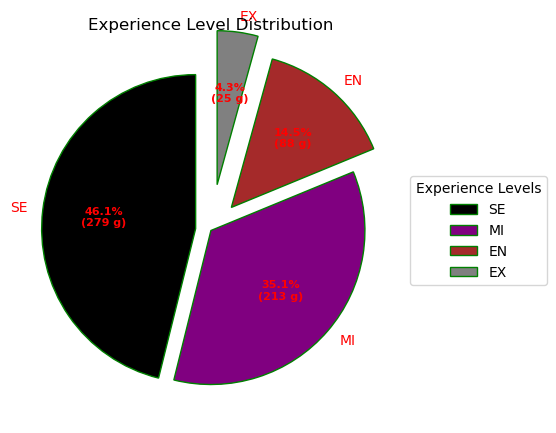

In [23]:
# Calculate the counts of each category
exp_counts = data['experience_level'].value_counts()

# Create a DataFrame with the top 10 categories and their counts
exp_counts = pd.DataFrame({'experience_level': exp_counts.index, 'Count': exp_counts.values})

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3)

# Creating color parameters
colors = ("black", "purple", "brown", "grey")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax.pie(exp_counts['Count'],
                                  autopct=lambda pct: func(pct, exp_counts['Count']),
                                  explode=explode,
                                  labels=exp_counts['experience_level'],
                                  shadow=False,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="red"))

# Adding legend
ax.legend(wedges, exp_counts['experience_level'],
          title="Experience Levels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Experience Level Distribution")

# Show plot
plt.show()


### Observation

- Senior level experienced techies are highly represented in techs offered jobs, followed by the mid levels.
- The expert level are minimal are the least in the category

In [24]:
# using the groupby function to see why experts are the least employed

# getting the count representaton of the deposit and default column
cross_tab = pd.crosstab(index=data['job_title'],
                        columns=data['experience_level'])
cross_tab

experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,0,0,1,0
AI Scientist,4,0,2,1
Analytics Engineer,0,2,0,2
Applied Data Scientist,1,0,2,2
Applied Machine Learning Scientist,1,0,3,0
BI Data Analyst,2,1,3,0
Big Data Architect,0,0,0,1
Big Data Engineer,3,0,3,2
Business Data Analyst,2,0,3,0


#### why are the experts the least? This because they mostly hold keey positions like director and lead roles.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   company_location    607 non-null    object
 1   employee_residence  607 non-null    object
 2   work_year           607 non-null    int64 
 3   experience_level    607 non-null    object
 4   employment_type     607 non-null    object
 5   job_title           607 non-null    object
 6   salary              607 non-null    int64 
 7   salary_currency     607 non-null    object
 8   salary_in_usd       607 non-null    int64 
 9   remote_ratio        607 non-null    int64 
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


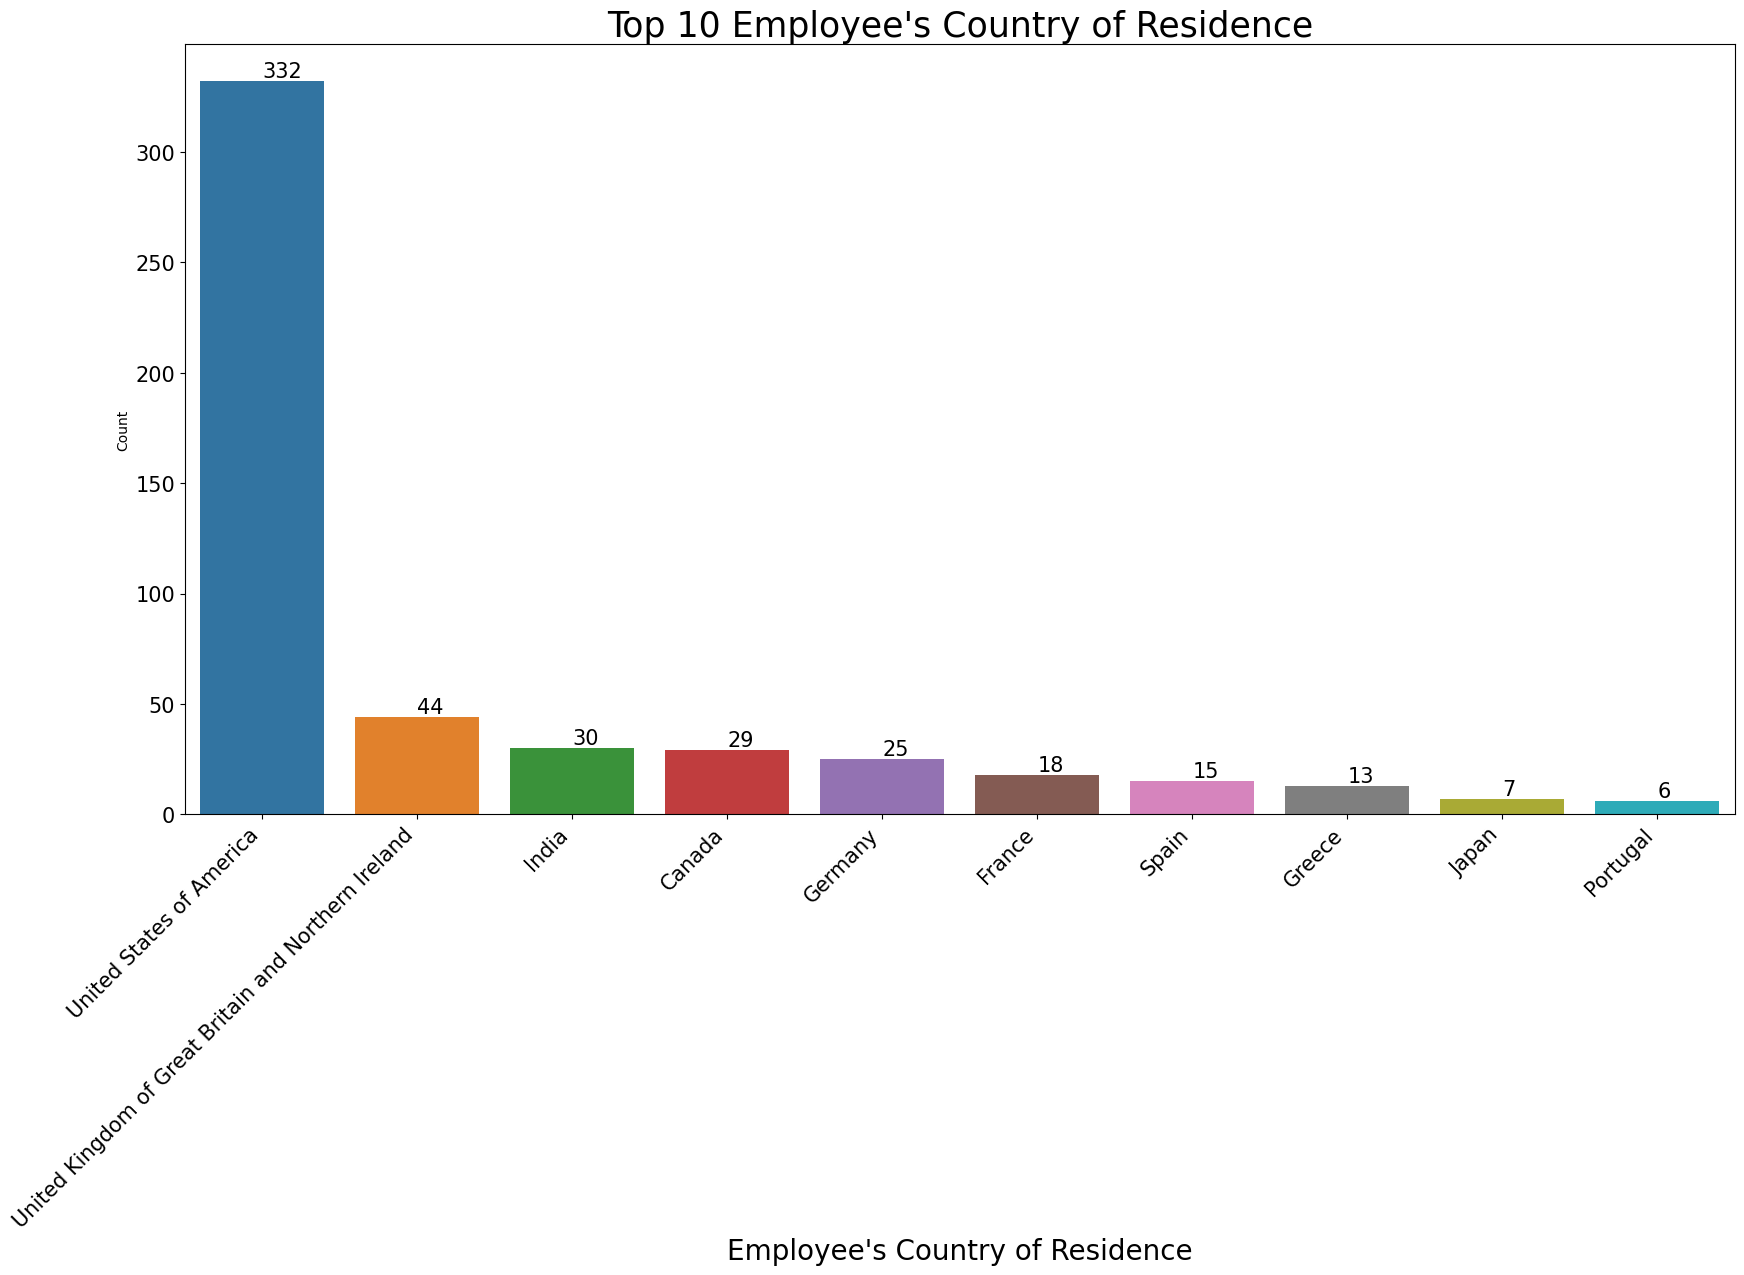

In [26]:

# Calculate the counts of each category
emp_counts = data['employee_residence'].value_counts().head(10)

# Create a DataFrame with the top 10 categories and their counts
top_10 = pd.DataFrame({'employee_residence': emp_counts.index, 'Count': emp_counts.values})

# Plot the countplot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(data=top_10, x='employee_residence', y='Count')
plt.xlabel("Employee's Country of Residence", size =20 )
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel('Count')
plt.yticks(fontsize=15)
plt.title("Top 10 Employee's Country of Residence", size=25)

# Add tooltips to the bars
for i, count in enumerate(top_10['Count']):
    plt.text(i, count, str(count), va='bottom', fontsize=15)

plt.show()


In [27]:
data['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

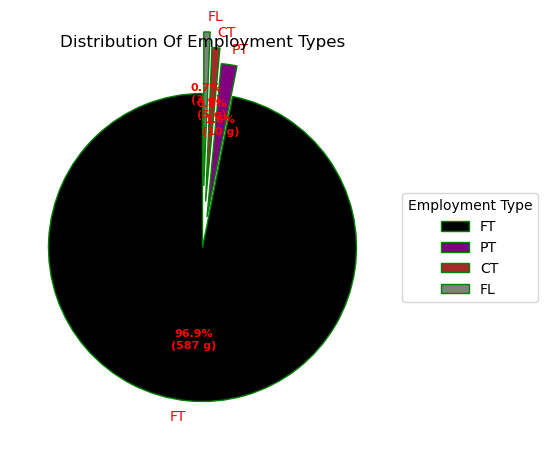

In [28]:
# Calculate the counts of each category
emp_counts = data['employment_type'].value_counts()

# Create a DataFrame with the top 10 categories and their counts
emp_counts = pd.DataFrame({'employment_type': emp_counts.index, 'Count': emp_counts.values})

# Creating explode data
explode = (0, 0.2, 0.3, 0.4)

# Creating color parameters
colors = ("black", "purple", "brown", "grey")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax.pie(emp_counts['Count'],
                                  autopct=lambda pct: func(pct, exp_counts['Count']),
                                  explode=explode,
                                  labels=emp_counts['employment_type'],
                                  shadow=False,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="red"))

# Adding legend
ax.legend(wedges, emp_counts['employment_type'],
          title="Employment Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Distribution Of Employment Types")

# Show plot
plt.show()

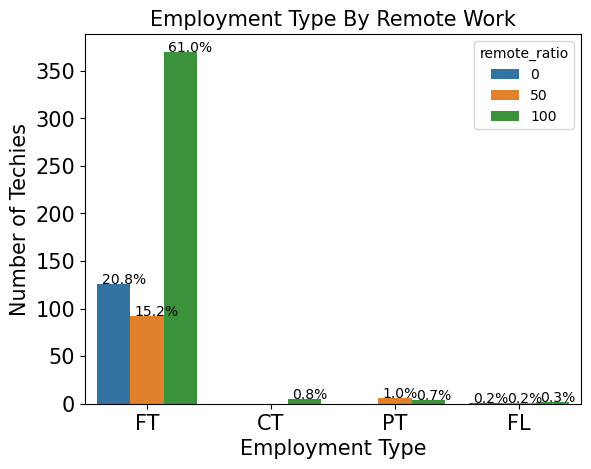

In [29]:
ax=sns.countplot(x='employment_type', hue='remote_ratio', data=data)

plt.xticks(size=15)
plt.xlabel('Employment Type', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Techies', size=15)
plt.title('Employment Type By Remote Work', size=15)
# Calculate percentages
total = float(len(data['employment_type']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=10)

plt.show()

## Observations
- All contractors in the data collected work remotely.
- Freelancers have roughly equal distribution accross the type of remote works.
- Majority of the full-timers working for companys work largely remotely (61.0%) while 20.8% of them work on-site and 15.2% work only 50% on-site.

In [30]:
data['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

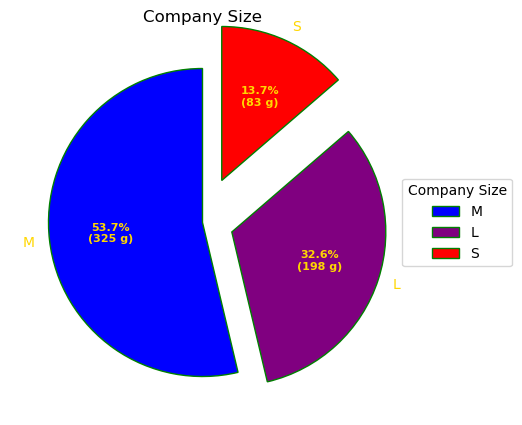

In [31]:
# Calculate the counts of each category
size_counts = data['company_size'].value_counts()

# Create a DataFrame with the top 10 categories and their counts
size_counts = pd.DataFrame({'company_size': size_counts.index, 'Count': size_counts.values})

# Creating explode data
explode = (0, 0.2, 0.3)

# Creating color parameters
colors = ("blue", "purple", "red")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax.pie(size_counts['Count'],
                                  autopct=lambda pct: func(pct, exp_counts['Count']),
                                  explode=explode,
                                  labels=size_counts['company_size'],
                                  shadow=False,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="gold"))

# Adding legend
ax.legend(wedges, size_counts['company_size'],
          title="Company Size",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Company Size")

# Show plot
plt.show()

### Observations

- 53.7% of the techs are with medium sized companies while 13.7% of them are with the small sized companies

In [32]:
data['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [33]:
from datetime import datetime

In [34]:
import datetime

# Convert the 'work_Year' column to datetime
data['work_year'] = pd.to_datetime(data['work_year'], format='%Y')

print(data)

                                      company_location  \
0                                              Germany   
1                                                Japan   
2    United Kingdom of Great Britain and Northern I...   
3                                             Honduras   
4                             United States of America   
..                                                 ...   
602                           United States of America   
603                           United States of America   
604                           United States of America   
605                           United States of America   
606                           United States of America   

                                    employee_residence  work_year  \
0                                              Germany 2020-01-01   
1                                                Japan 2020-01-01   
2    United Kingdom of Great Britain and Northern I... 2020-01-01   
3                          

Text(0, 0.5, 'Salary(USD)')

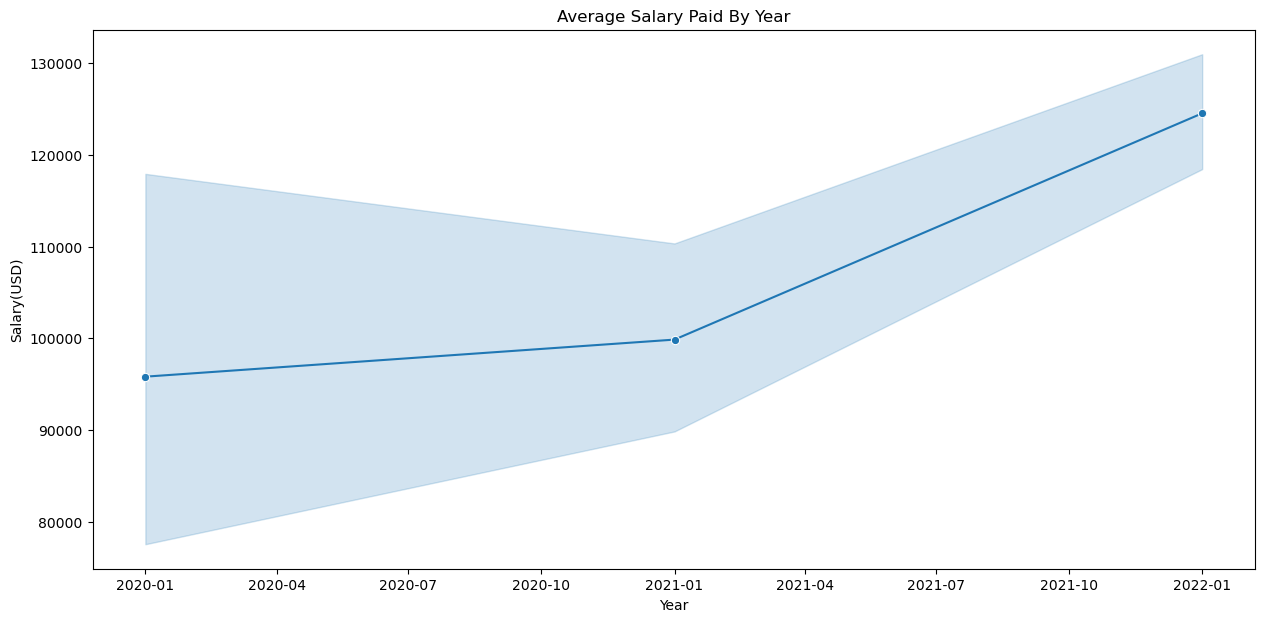

In [35]:
plt.figure(figsize=(15,7))
sns.lineplot(x='work_year', y='salary_in_usd', data=data, marker='o')
plt.title('Average Salary Paid By Year')
plt.xlabel('Year')
plt.ylabel('Salary(USD)')

### Observation
- There is a gradual increase in the salaries given to techs from 2020 to 2021 but a sharp increase in the year 2022.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_location    607 non-null    object        
 1   employee_residence  607 non-null    object        
 2   work_year           607 non-null    datetime64[ns]
 3   experience_level    607 non-null    object        
 4   employment_type     607 non-null    object        
 5   job_title           607 non-null    object        
 6   salary              607 non-null    int64         
 7   salary_currency     607 non-null    object        
 8   salary_in_usd       607 non-null    int64         
 9   remote_ratio        607 non-null    int64         
 10  company_size        607 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 73.1+ KB


In [37]:
# the average salary in usd
data['salary_in_usd'].mean()

112297.86985172982

In [38]:
data['remote_ratio']= data['remote_ratio'].astype(str)

Text(0.5, 1.0, 'Average Salary Earned By Employment Type Per Year')

<Figure size 3000x1500 with 0 Axes>

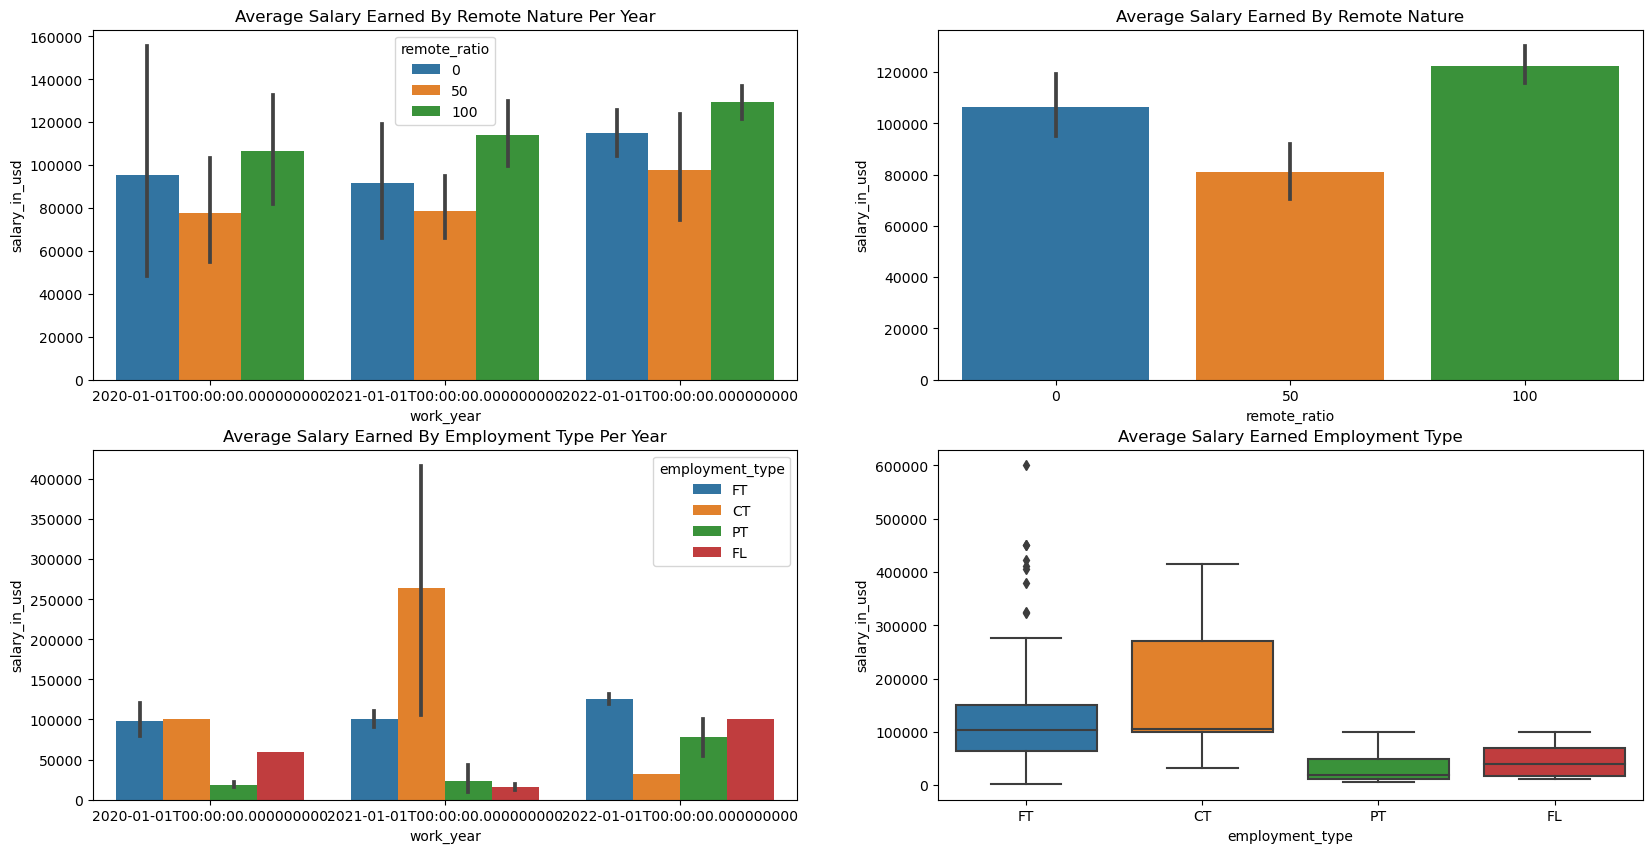

In [39]:
#define dimensions of subplots (rows, columns)
plt.figure(figsize=(30,15))
fig, axes = plt.subplots(2, 2, figsize=(20,10))

#create chart in each subplot

sns.barplot(x='work_year', y='salary_in_usd', hue='remote_ratio', data=data, ax=axes[0,0])
axes[0,0].set_title("Average Salary Earned By Remote Nature Per Year")
sns.barplot(x='remote_ratio', y='salary_in_usd', data=data, ax=axes[0,1])
axes[0,1].set_title("Average Salary Earned By Remote Nature")
sns.boxplot(x='employment_type', y='salary_in_usd', data=data, ax=axes[1,1])
axes[1,1].set_title("Average Salary Earned Employment Type")
sns.barplot(x='work_year', y='salary_in_usd', hue='employment_type', data=data, ax=axes[1,0])
axes[1,0].set_title("Average Salary Earned By Employment Type Per Year")

### Observations
- It is observed that over the years, thos who work romotely from home (>= 80% remote) received the highest salaries all through the years in view folowed by those that work on-site.

- It is also observed that techs that work as contractors on the average gets the highest pay.
- In 2021, contractors got the highest pay in salary and least paid in 2022 where full timers got the hihest pay.

In [40]:
pivot_experience = data.pivot_table(index='experience_level', values='salary_in_usd',columns='work_year', aggfunc='mean')
#pivot_experience = pivot_experience.sort_values(by='salary_in_usd',ascending=False)
pivot_experience

work_year,2020-01-01,2021-01-01,2022-01-01
experience_level,,,
EN,63648.6000,59101.021277,65423.428571
EX,202416.5000,223752.727273,178313.846154
MI,85950.0625,85490.088889,91193.956044
SE,137240.5000,126596.188406,143043.398964


Text(0.5, 0, 'Experience Level')

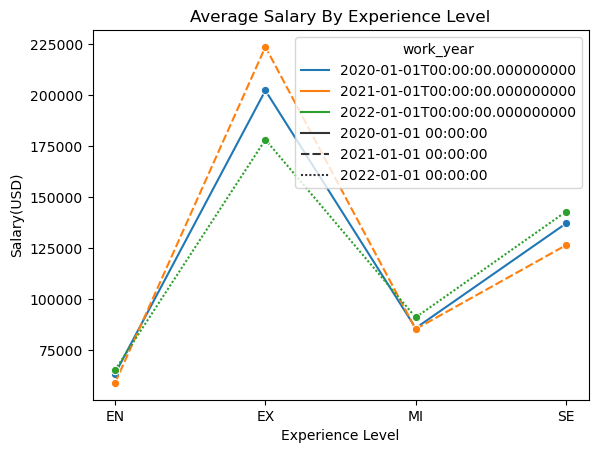

In [41]:
sns.lineplot(data=pivot_experience, marker='o')
plt.title('Average Salary By Experience Level')
plt.ylabel('Salary(USD)')
plt.xlabel('Experience Level')

### Observation
- Tech experts have been the highest paid through the years, but droped in the year 2022.

In [42]:
pivot_country = data.pivot_table(index='company_location', values='salary_in_usd', aggfunc='mean')
pivot_country = pivot_country.sort_values(by='salary_in_usd', ascending=False).head(10)
pivot_country

,salary_in_usd
company_location,
Russian Federation,157500.000000
United States of America,144055.261972
New Zealand,125000.000000
Israel,119059.000000
Japan,114127.333333
Australia,108042.666667
Iraq,100000.000000
United Arab Emirates,100000.000000
Algeria,100000.000000


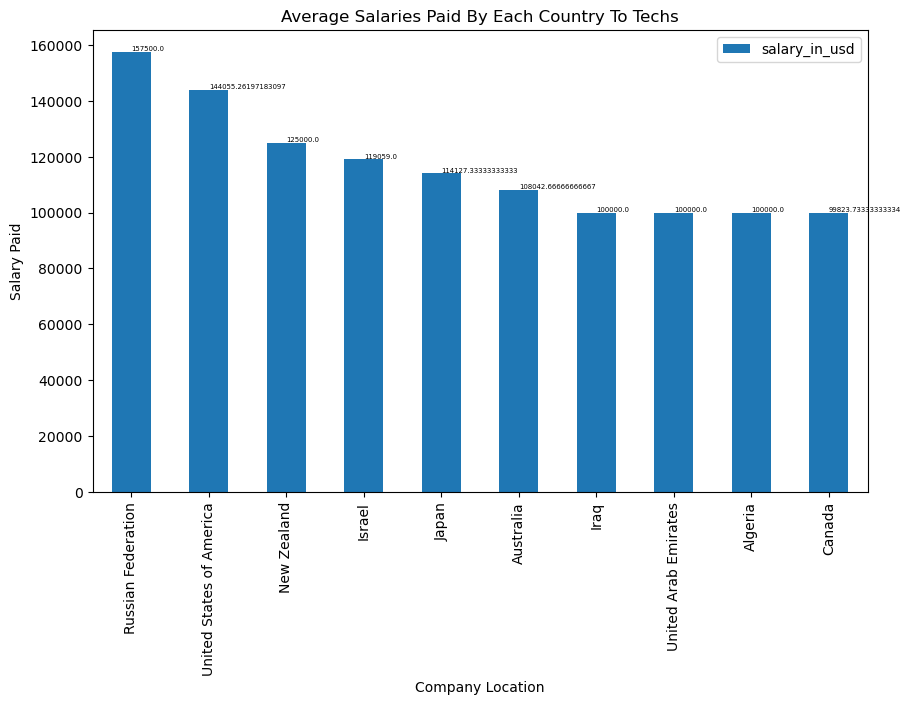

In [43]:
pivot_country.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Company Location')
plt.ylabel('Salary Paid')
plt.title('Average Salaries Paid By Each Country To Techs')

# Add tooltips to the bars
for i, count in enumerate(pivot_country['salary_in_usd']):
    plt.text(i, count, str(count), va='bottom', fontsize=5)

In [44]:
pivot_job = data.pivot_table(index='job_title', values='salary_in_usd', aggfunc='mean')
pivot_job = pivot_job.sort_values(by='salary_in_usd', ascending=False).head(10)
pivot_job

,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Principal Data Engineer,328333.333333
Financial Data Analyst,275000.000000
Principal Data Scientist,215242.428571
Director of Data Science,195074.000000
Data Architect,177873.909091
Applied Data Scientist,175655.000000
Analytics Engineer,175000.000000
Data Specialist,165000.000000


Text(0.5, 1.0, 'Top 10 Job Titles In Techs Recieving The Highest (Avg) Salaries')

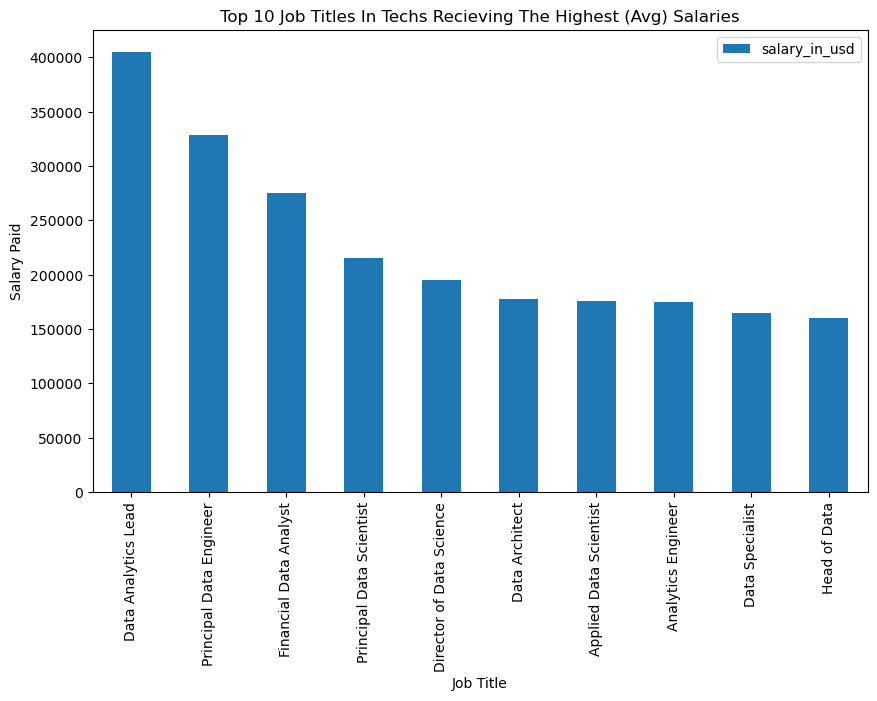

In [45]:
pivot_job.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Job Title')
plt.ylabel('Salary Paid')
plt.title('Top 10 Job Titles In Techs Recieving The Highest (Avg) Salaries')

In [46]:
pivot_size = data.pivot_table(index='company_size', values='salary_in_usd', aggfunc='mean')
pivot_size= pivot_size.sort_values(by='salary_in_usd', ascending=True).head(10)
pivot_size

,salary_in_usd
company_size,
S,77632.674699
M,116905.466258
L,119242.994949


Text(0.5, 1.0, 'Average Salary By Company Size')

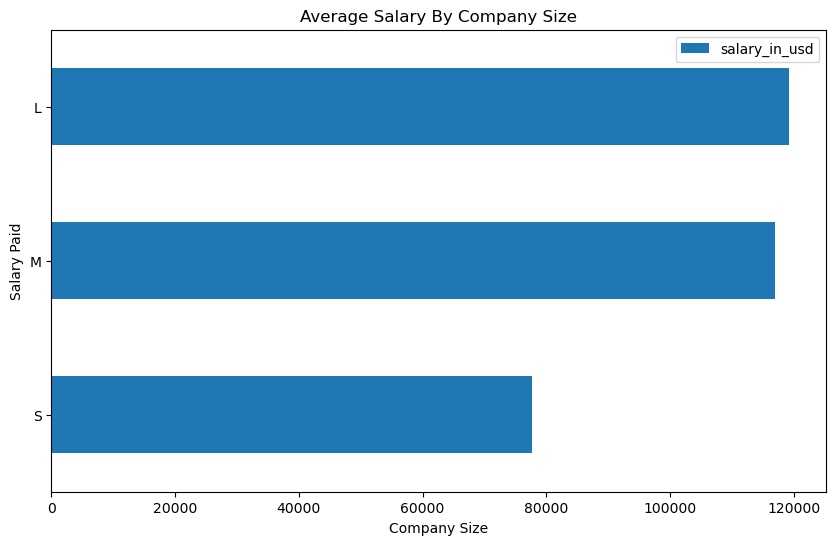

In [47]:
pivot_size.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Company Size')
plt.ylabel('Salary Paid')
plt.title('Average Salary By Company Size')

In [48]:
pivot_job = data.pivot_table(index='job_title', values='salary_in_usd', columns='employment_type', aggfunc='mean')
#pivot_job = pivot_job.sort_values(by='salary_in_usd', ascending=False).head(10)
pivot_job

employment_type,CT,FL,FT,PT
job_title,,,,
3D Computer Vision Researcher,NaN,NaN,NaN,5409.0
AI Scientist,NaN,NaN,87789.800000,12000.0
Analytics Engineer,NaN,NaN,175000.000000,NaN
Applied Data Scientist,NaN,NaN,175655.000000,NaN
Applied Machine Learning Scientist,31875.0,NaN,178800.000000,NaN
BI Data Analyst,NaN,NaN,74755.166667,NaN
Big Data Architect,NaN,NaN,99703.000000,NaN
Big Data Engineer,NaN,NaN,51974.000000,NaN
Business Data Analyst,100000.0,NaN,70864.000000,NaN


# Linear Regression For Salary Prediction

In [49]:
# Encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in data.columns[:]:
    if (data[i].dtype=='object'):
        data[i]=encoder.fit_transform(data[i])
    elif (data[i].dtype=='datetime64[ns]'):
        data[i]=encoder.fit_transform(data[i])
    else:
        data[i]=data[i]
        
data.head()

,company_location,employee_residence,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size
0,15,17,0,2,2,22,70000,7,79833,0,0
1,25,27,0,3,2,41,260000,16,260000,0,2
2,47,54,0,3,2,7,85000,8,109024,2,1
3,17,19,0,2,2,47,20000,16,20000,0,2
4,48,55,0,3,2,38,150000,16,150000,2,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   company_location    607 non-null    int32
 1   employee_residence  607 non-null    int32
 2   work_year           607 non-null    int64
 3   experience_level    607 non-null    int32
 4   employment_type     607 non-null    int32
 5   job_title           607 non-null    int32
 6   salary              607 non-null    int64
 7   salary_currency     607 non-null    int32
 8   salary_in_usd       607 non-null    int64
 9   remote_ratio        607 non-null    int32
 10  company_size        607 non-null    int32
dtypes: int32(8), int64(3)
memory usage: 54.1 KB


In [51]:
# droppin the salary and currency columns
data.drop(['salary_currency','salary', 'work_year'], inplace=True, axis=1)

In [52]:
data.head()

,company_location,employee_residence,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,15,17,2,2,22,79833,0,0
1,25,27,3,2,41,260000,0,2
2,47,54,3,2,7,109024,2,1
3,17,19,2,2,47,20000,0,2
4,48,55,3,2,38,150000,2,0


In [53]:
data.columns

Index(['company_location', 'employee_residence', 'experience_level',
       'employment_type', 'job_title', 'salary_in_usd', 'remote_ratio',
       'company_size'],
      dtype='object')

In [54]:
#dependent variables
X = data[['company_location', 'employee_residence',
       'experience_level', 'employment_type', 'job_title',
       'remote_ratio', 'company_size']]

In [55]:
#independent variable
y= data['salary_in_usd']

In [56]:
# Training and Testing

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
# Predict the values
y_pred = lr.predict(X_test)

In [61]:
#y_pred

In [62]:
r2_score(y_test,y_pred)

0.27573859635975295